# Monthly Prediction Approach Using Imple Linear Regression

Import the necassary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

Load the CSV data and convert 'Dates' to datetime format. Then extract month and year.

In [5]:
df = pd.read_csv("Nat_Gas.csv")
df['Prices'] = df['Prices'].astype(float)

df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year

df.head()

,Dates,Prices,Month,Year
0,2020-10-31,10.1,10,2020
1,2020-11-30,10.3,11,2020
2,2020-12-31,11.0,12,2020
3,2021-01-31,10.9,1,2021
4,2021-02-28,10.9,2,2021


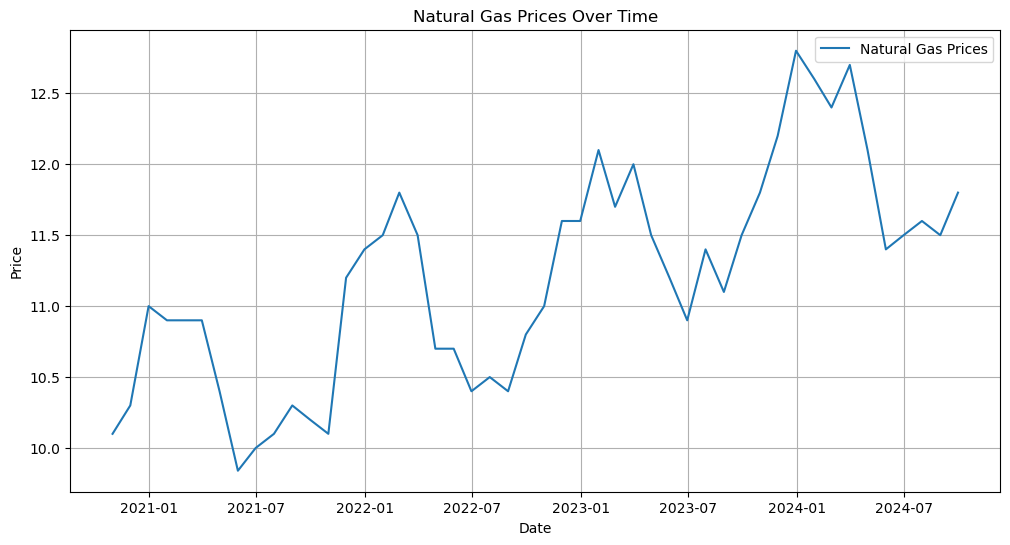

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Dates'], 
         df['Prices'], 
         label='Natural Gas Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

Prepare data for linear regression and fit a linear regression model

In [7]:
x = df['Year'].values.reshape(-1, 1)
y = df['Prices']

reg = LinearRegression().fit(x, y)

Develop a function to predict prices for each month of a given year.

In [8]:
def period_price_prediction(year, start_month):
    price_list = []
    for month in range(start_month, 13):
        x = df[df['Month'] == month]['Year'].values.reshape(-1, 1)
        y = df[df['Month'] == month]['Prices']
        
        if len(x) > 0 and len(y) > 0:
            reg = LinearRegression().fit(x, y)
            price = reg.predict([[year]])
            price_list.append(round(float(price[0]), 2))
        else:
            price_list.append(np.nan)  # Fill with NaN for missing data

    return price_list

In [9]:
prices_2024 = period_price_prediction(2024, 10)
prices_2025 = period_price_prediction(2025, 1)
price_list = prices_2024 + prices_2025

print(f"Natural Gas Price Prediction for 2024 - 2025 is: {price_list}")

Natural Gas Price Prediction for 2024 - 2025 is: [12.25, 12.85, 13.1, 13.2, 12.8, 13.25, 12.65, 12.08, 11.95, 12.25, 11.9, 12.45, 12.85, 13.46, 13.66]


Create a function to generate the last day of each month in a given year. Get the last day of each month for the remaning months 2024 and 2025.

In [10]:
def get_last_of_each_month(year):
    if year == 2024:
        dates = pd.date_range(start=f'{year}-10-01', end=f'{year}-12-31', freq='ME')
        return dates.strftime('%Y-%m-%d').tolist()
    else:
        dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='ME')
        return dates.strftime('%Y-%m-%d').tolist()

dates_2024 = get_last_of_each_month(2024)
dates_2025 = get_last_of_each_month(2025)
dates_joined = dates_2024 + dates_2025

print(dates_joined)

['2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31']


Now create a DataFrame with the predicted prices for each month in the period.

In [11]:
proj_df = pd.DataFrame({'Dates': dates_joined, 'Prices': price_list})
proj_df['Dates'] = pd.to_datetime(proj_df['Dates'])
proj_df['Month'] = proj_df['Dates'].dt.month
proj_df['Year'] = proj_df['Dates'].dt.year

print('Projected Data Frame for Oct 2024 - Dec 2025')
print(proj_df)

Projected Data Frame for Oct 2024 - Dec 2025
        Dates  Prices  Month  Year
0  2024-10-31   12.25     10  2024
1  2024-11-30   12.85     11  2024
2  2024-12-31   13.10     12  2024
3  2025-01-31   13.20      1  2025
4  2025-02-28   12.80      2  2025
5  2025-03-31   13.25      3  2025
6  2025-04-30   12.65      4  2025
7  2025-05-31   12.08      5  2025
8  2025-06-30   11.95      6  2025
9  2025-07-31   12.25      7  2025
10 2025-08-31   11.90      8  2025
11 2025-09-30   12.45      9  2025
12 2025-10-31   12.85     10  2025
13 2025-11-30   13.46     11  2025
14 2025-12-31   13.66     12  2025


If you wanted to retrieve gas prices for a specific month and year the following function can be used.

In [12]:
def get_gas_price(month, year):
    price = proj_df[(proj_df['Month'] == month) & (proj_df['Year'] == year)]['Prices']
    if not price.empty:
        return price.iloc[0]
    else:
        raise ValueError(f"No gas price found for Month: {month}, Year: {year}")
    
print(f"Natural Gas Price Prediction for November, 2025 is: ${get_gas_price(11, 2025)}")

Natural Gas Price Prediction for November, 2025 is: $13.46


Concatenate the actual and projected data into a final DataFrame. Remember to make provisions to fill missing prices for seamless plotting.

In [13]:
final_df = pd.concat([df, proj_df], ignore_index=True)

final_df['Prices'] = final_df['Prices'].interpolate()

print('\nFinal Data Frame')
print(final_df)


Final Data Frame
        Dates  Prices  Month  Year
0  2020-10-31   10.10     10  2020
1  2020-11-30   10.30     11  2020
2  2020-12-31   11.00     12  2020
3  2021-01-31   10.90      1  2021
4  2021-02-28   10.90      2  2021
..        ...     ...    ...   ...
58 2025-08-31   11.90      8  2025
59 2025-09-30   12.45      9  2025
60 2025-10-31   12.85     10  2025
61 2025-11-30   13.46     11  2025
62 2025-12-31   13.66     12  2025

[63 rows x 4 columns]


Plot the combined actual and predicted natural gas prices

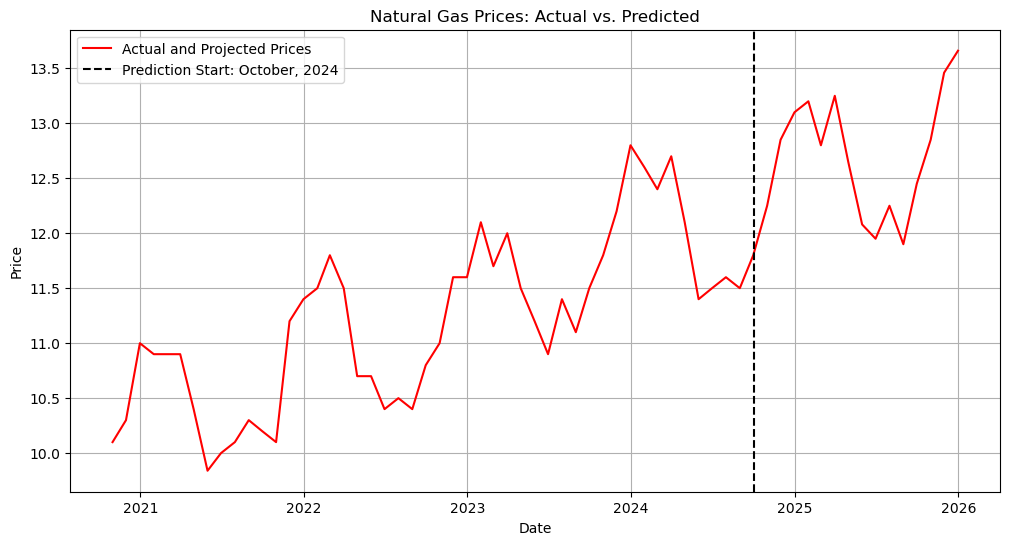

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(final_df['Dates'], final_df['Prices'], color='red', label='Actual and Projected Prices')
plt.axvline(x=pd.Timestamp("2024-10-01"), color='black', linestyle='--', label='Prediction Start: October, 2024')
plt.title('Natural Gas Prices: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

For a monthly Seasonal Trend Analysis the Folllowing can be done:

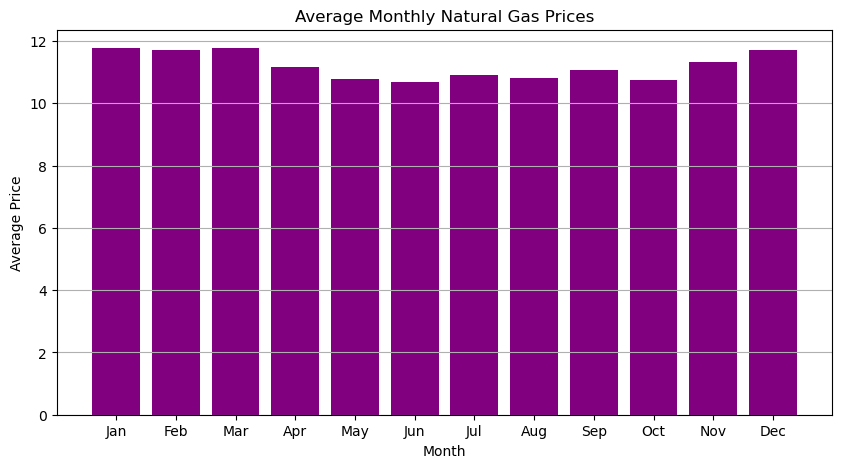

In [15]:
monthly_avg = df.groupby('Month')['Prices'].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_avg.index, monthly_avg.values, color='purple')
plt.title('Average Monthly Natural Gas Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()